---

## **<font color="#b08acd"> Modelación Climática Tropical</font>**
### **<font color="mediumpurple"> Subplot de coeficientes de regresión para la precipitación en JJAS</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.patches import Rectangle

In [8]:
# Definimos la función para agregar la cbar
def add_map_colorbar(pos, axis, labelsita, fig, cs):
    cbar_ax = fig.add_axes(axis)  
    cbar = fig.colorbar(cs, cax=cbar_ax, orientation=pos)
    cbar.ax.tick_params(labelsize=13)
    if labelsita is not None:
        cbar.set_label(label=labelsita, fontsize=14)
    return cbar

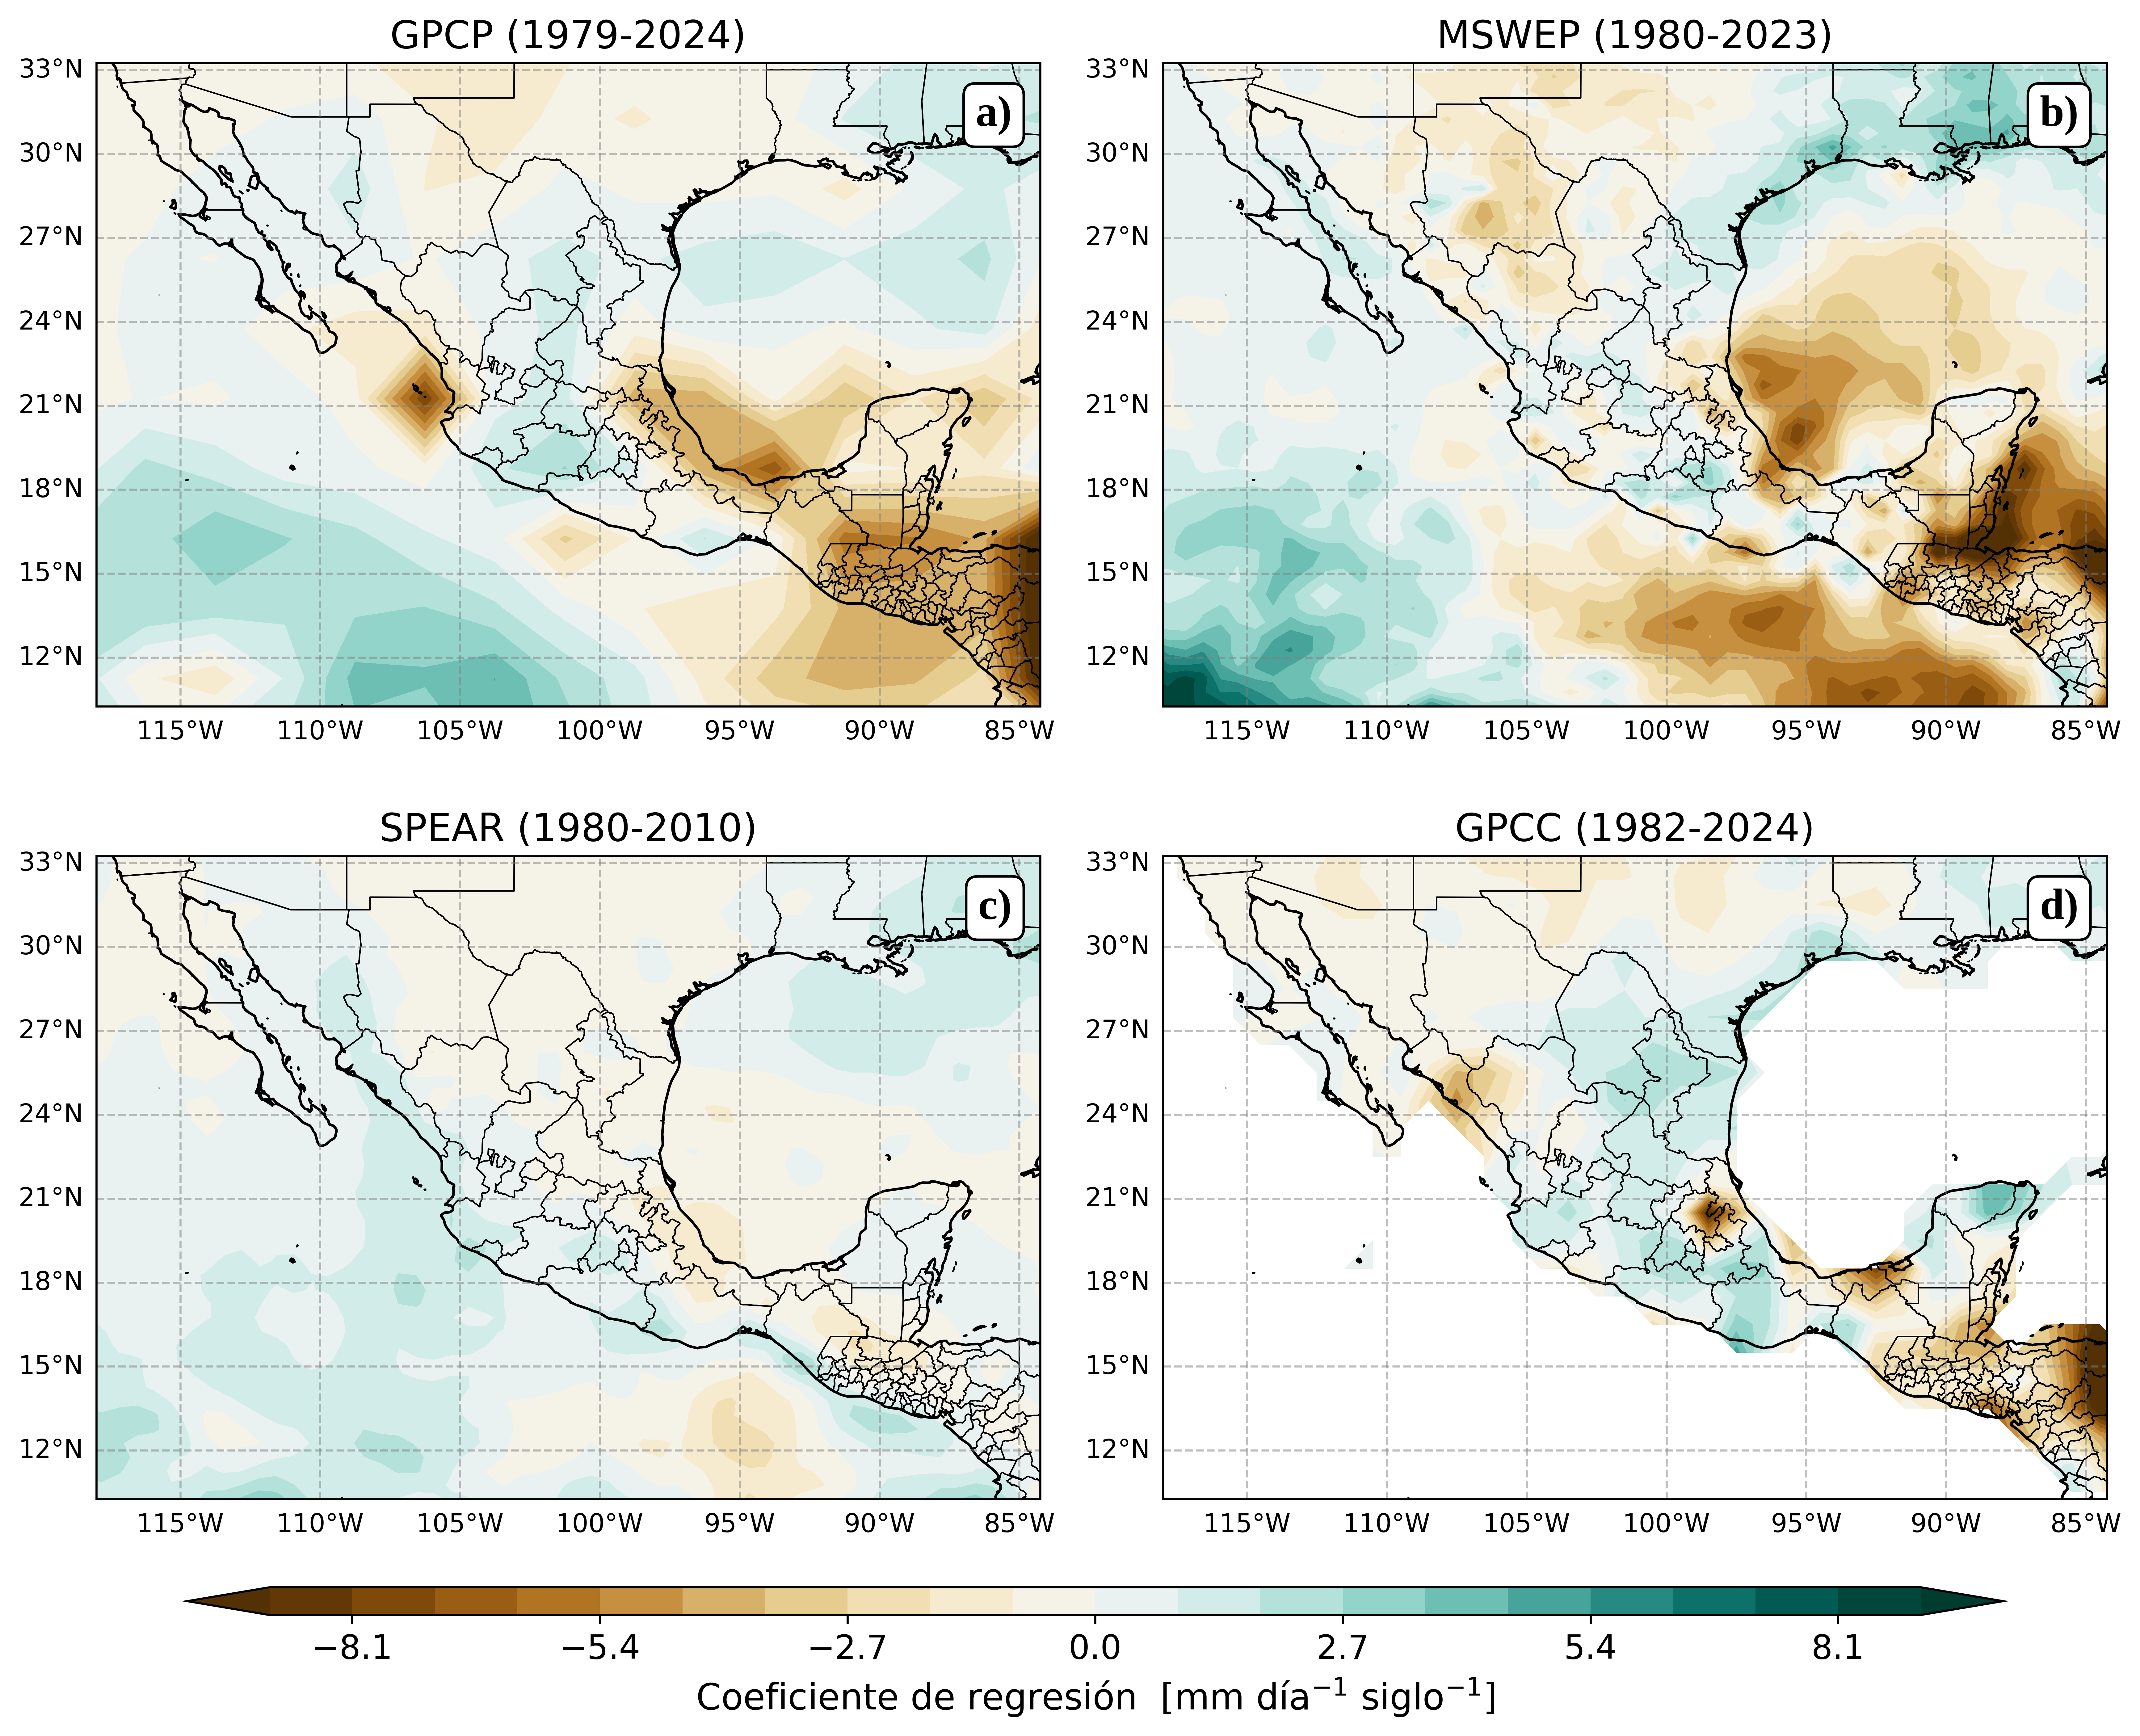

In [9]:
# Vamos a cargar todos los archivos

# Hacemos un diccionario con el nombre de la precipitación en cada dataset
var_names = {'GPCP_JJASV3_actualizado.nc': 'precip','MSWEP_JJAS_actualizado.nc': 'precipitation','SPEAR_ens80_ClimJJAS.nc': 'precip', 'GPCCV4_JJAS_actualizado.nc':'precip'}

# Abrimos los datos de los coeficientes de regresión y los que tienen la variable
files_coef = ['coeficientes_regresion_GPCPV3_actualizado.nc', 'coeficientes_regresion_MSWEP_actualizado.nc', 'coef_regresion_spear_ens_mean_80_allens.nc', 'coeficientes_regresion_GPCCV3_actualizado.nc' ]

files_precip = ['GPCP_JJASV3_actualizado.nc', 'MSWEP_JJAS_actualizado.nc', 'SPEAR_ens80_ClimJJAS.nc', 'GPCCV4_JJAS_actualizado.nc']

titulos = ['GPCP (1979-2024)', 'MSWEP (1980-2023)', 'SPEAR (1980-2010)', 'GPCC (1982-2024)']

panel_labels = ['a)', 'b)', 'c)', 'd)']

# Limites con linspace para cada dato
levels_globo = np.linspace(-9, 9, 21)  

# Fig. para subplots, elegir el dpi
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()  

#fig = plt.figure(figsize=(10, 7), dpi=120)

# ciclo para graficar en subplots
for i, (file_coef, file_precip, titulo, level_globo) in enumerate(zip(files_coef, files_precip, titulos, levels_globo)):
    
    ds_coef = xr.open_dataset(file_coef)
    matriz_m_da = ds_coef.to_array()[0] 
    matriz_m_da = matriz_m_da * 100

    ds_precip = xr.open_dataset(file_precip)
    var_name = var_names[file_precip]  
    precip = ds_precip[var_name]

    ax = axs[i]
    ax.coastlines()
    
    # Graficar los coeficientes de regresión
    cs = ax.contourf(matriz_m_da.lon, matriz_m_da.lat, matriz_m_da, levels=levels_globo, cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
    ax.set_extent([242, 275.75, 10.25, 33.25], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False

    ax.set_title(titulo, fontsize=15)

    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

    # Cbar
add_map_colorbar('horizontal', [0.16, 0.07, 0.7, 0.015], 'Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', fig, cs)
fig.subplots_adjust(hspace=0.15, wspace=0.13, bottom=0.12, top=0.92)

plt.show()

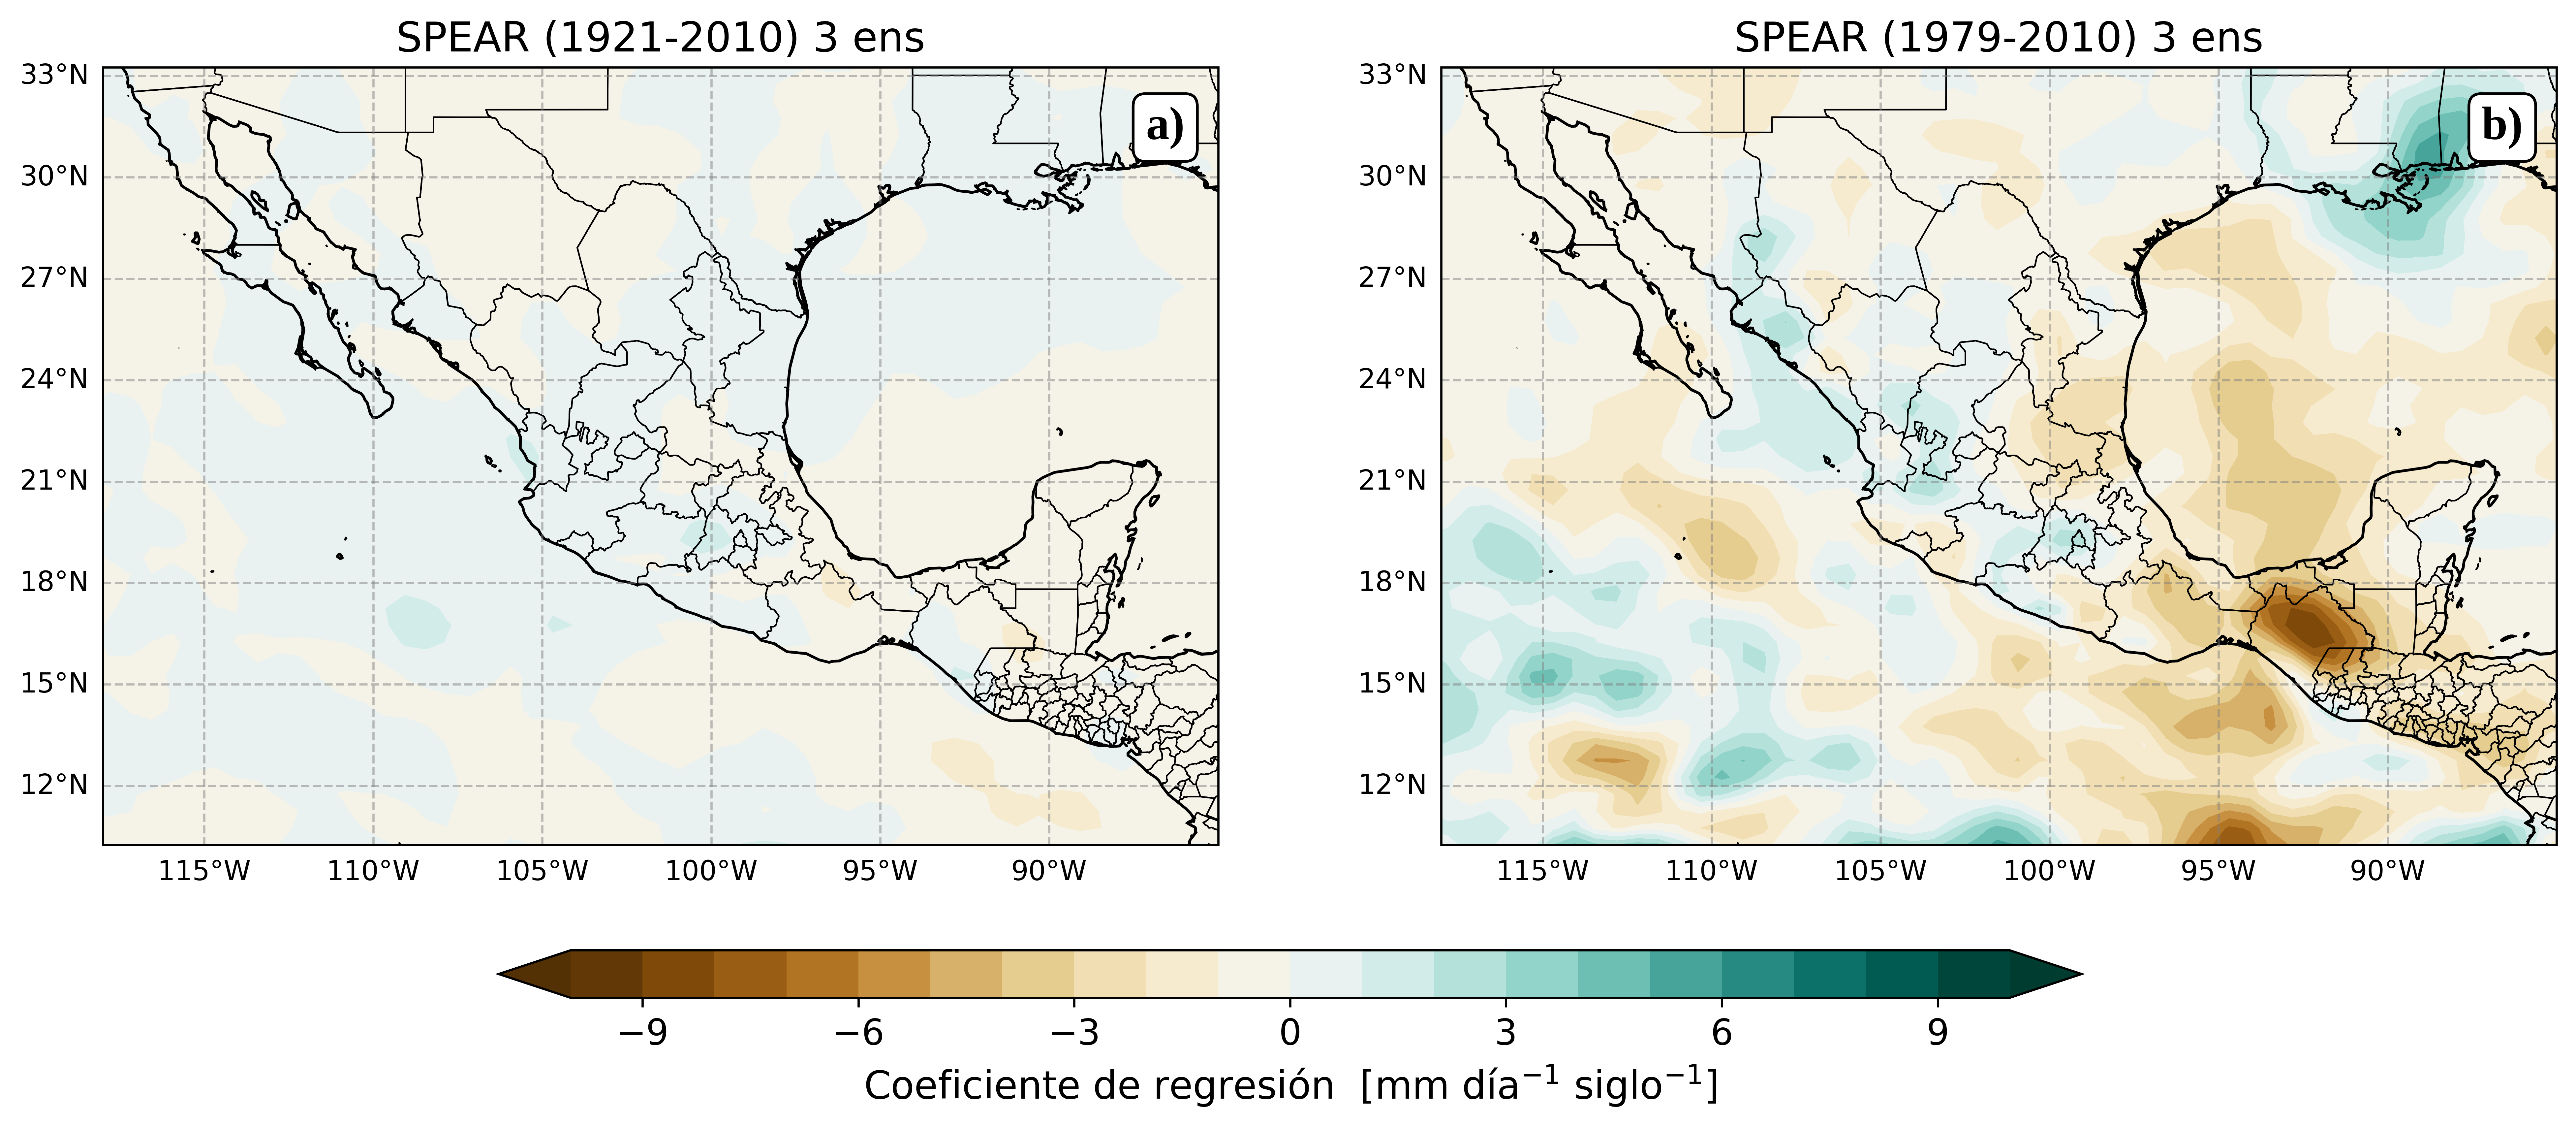

In [10]:
# Primero hacemos un diccionario con el nombre de la precipitación en cada uno (son 2)
var_names = {'SPEAR_JJAS_complete.nc': 'precip', 'SPEAR_JJAS.nc':'precip'}

# abriremos los datos de los coeficientes de regresión y los que tienen la variable
#files_coef = ['coeficientes_regresion_SPEARsin_complete.nc', 'coeficientes_regresion_SPEARsin.nc' ]
files_coef = ['coef_regresion_spear_ens_mean_p21.nc', 'coef_regresion_spear_ens_mean_p80.nc' ]

files_precip = ['SPEAR_JJAS_complete.nc', 'SPEAR_JJAS.nc']

titulos = ['SPEAR (1921-2010) 3 ens', 'SPEAR (1979-2010) 3 ens']

panel_labels = ['a)', 'b)']

# Limites con linspace para cada dataset
levels_globo = np.linspace(-10, 10, 21)  

fig, axs = plt.subplots(1, 2, figsize=(16, 12), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()  

#fig = plt.figure(figsize=(10, 7), dpi=120)

# ciclo para graficar en subplots
for i, (file_coef, file_precip, titulo, level_globo) in enumerate(zip(files_coef, files_precip, titulos, levels_globo)):
    
    ds_coef = xr.open_dataset(file_coef)
    matriz_m_da = ds_coef.to_array()[0] 
    matriz_m_da = matriz_m_da * 100

    ds_precip = xr.open_dataset(file_precip)
    var_name = var_names[file_precip]  
    precip = ds_precip[var_name]

    ax = axs[i]
    ax.coastlines()
    
    # Graficar los coeficientes de regresión
    cs = ax.contourf(matriz_m_da.lon, matriz_m_da.lat, matriz_m_da, levels=levels_globo, cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
    ax.set_extent([242, 275, 10.25, 33.25], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False

    ax.set_title(titulo, fontsize=15)

    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

    # Colorbar
add_map_colorbar('horizontal', [0.25, 0.267, 0.5, 0.02], 'Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', fig, cs)

plt.show()

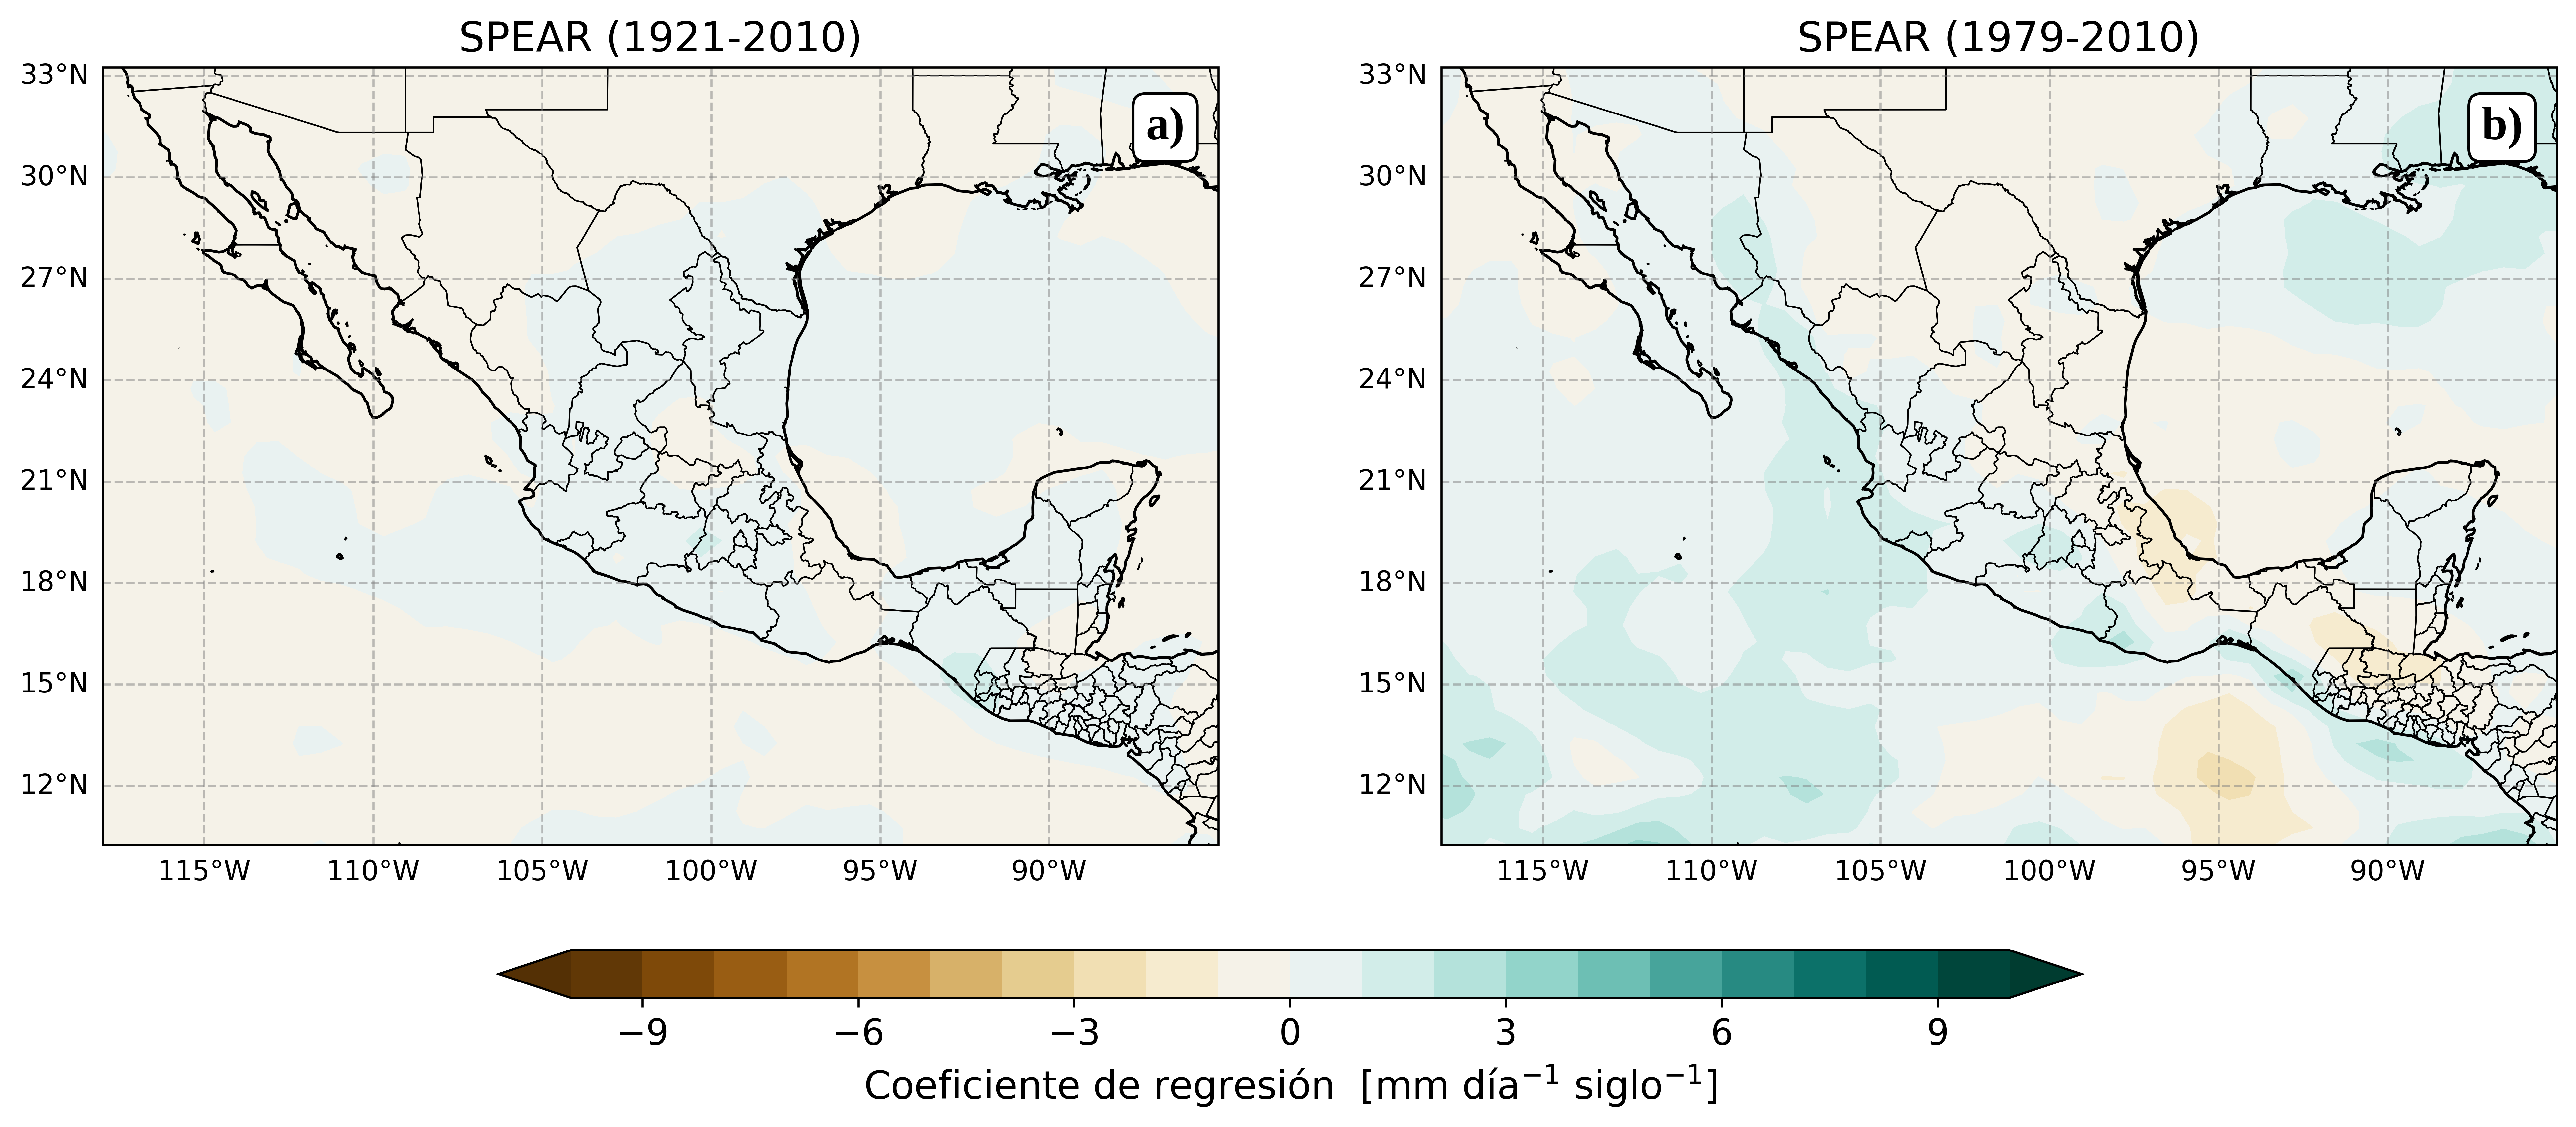

In [11]:
var_names = {'SPEAR_JJAS_complete.nc': 'precip', 'SPEAR_JJAS.nc':'precip'}

#files_coef = ['coeficientes_regresion_SPEARsin_complete.nc', 'coeficientes_regresion_SPEARsin.nc' ]
files_coef = ['coef_regresion_spear_ens_mean_21_allens.nc', 'coef_regresion_spear_ens_mean_80_allens.nc' ]

files_precip = ['SPEAR_JJAS_complete.nc', 'SPEAR_JJAS.nc']

titulos = ['SPEAR (1921-2010)', 'SPEAR (1979-2010)']

panel_labels = ['a)', 'b)']

# linspace 
levels_globo = np.linspace(-10, 10, 21)  

fig, axs = plt.subplots(1, 2, figsize=(16, 12), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()  

#fig = plt.figure(figsize=(10, 7), dpi=120)

# ciclo para graficar en subplots
for i, (file_coef, file_precip, titulo, level_globo) in enumerate(zip(files_coef, files_precip, titulos, levels_globo)):
    
    ds_coef = xr.open_dataset(file_coef)
    matriz_m_da = ds_coef.to_array()[0] 
    matriz_m_da = matriz_m_da * 100

    ds_precip = xr.open_dataset(file_precip)
    var_name = var_names[file_precip]  
    precip = ds_precip[var_name]

    ax = axs[i]
    ax.coastlines()
    
    # Graficar los coeficientes de regresión
    cs = ax.contourf(matriz_m_da.lon, matriz_m_da.lat, matriz_m_da, levels=levels_globo, cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
    ax.set_extent([242, 275, 10.25, 33.25], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False

    ax.set_title(titulo, fontsize=15)

    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

    # Colorbar
add_map_colorbar('horizontal', [0.25, 0.267, 0.5, 0.02], 'Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', fig, cs)

plt.show()